In [ ]:
#Import libraries
import os
from os import listdir
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


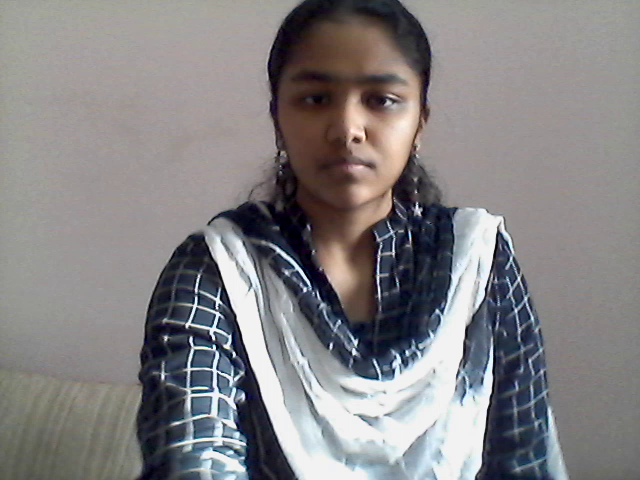

In [ ]:
img1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Read/inf0001.png")
cv2_imshow(img1)

In [ ]:
#Convert video to frames
!ffmpeg -i "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Dataset/WIN_20220826_07_23_47_Pro.mp4" -vf fps=30 "/content/Read/inf%04d.png"
#!ffmpeg -i "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Dataset/WIN_20220826_07_24_30_Pro.mp4" -vf fps=30 "/content/Read_1/inf%04d.jpeg"
#!ffmpeg -i "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Dataset/WIN_20220826_07_25_13_Pro.mp4" -vf fps=30 "/content/Read_1/inf%04d.jpeg"

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

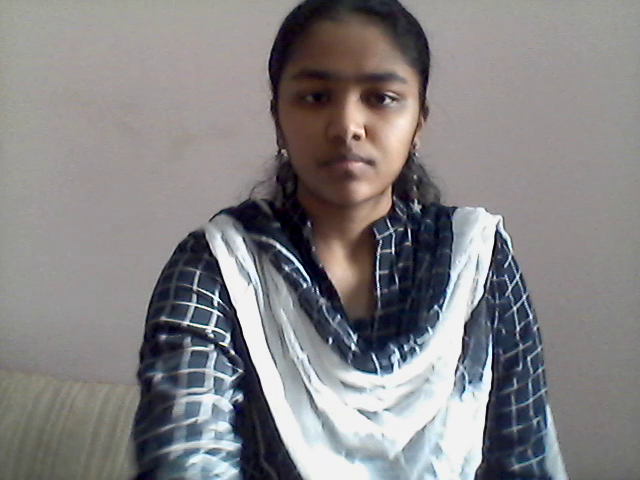

In [ ]:
#Read an image
first_img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Read/inf0002.png")
cv2_imshow(first_img)

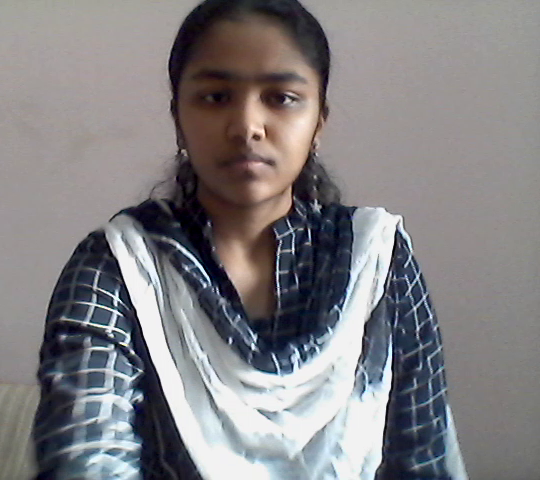

In [ ]:
#Cropping
crop_img1 = first_img[:,100:900]
cv2_imshow(crop_img1)

(256, 256, 3)


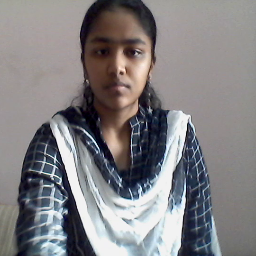

In [ ]:
#Resizing
resize_img1 = cv2.resize(crop_img1,(256,256))
print(resize_img1.shape)
cv2_imshow(resize_img1)

(256, 256)


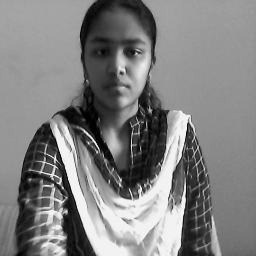

In [ ]:
#Convert to black-white
img1_bw = cv2.cvtColor(resize_img1, cv2.COLOR_BGR2GRAY)
print(img1_bw.shape)
cv2_imshow(img1_bw)

In [ ]:
#Crop,resize and convert to black and white
def preprocess_images(img):
  image_cropped = img[:100,800:]
  image_resized = cv2.resize(image_cropped,(256,256))
  image_bw = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY )
  return image_bw

In [ ]:
#Pre-processing
fdir = "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Read"
flist = os.listdir(fdir)
flist.sort()
c_output = "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/CroppedImages"

#If the mentioned directory does not exist
if not os.path.exists(c_output):
  os.mkdir(c_output)

for count in flist:
  img = cv2.imread(os.path.join(fdir,count))
  print(os.path.join(fdir,count))
  p_image = preprocess_images(img)
  cv2.imwrite(os.path.join(c_output,count),p_image)
  

/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Read/inf0002.png


error: ignored

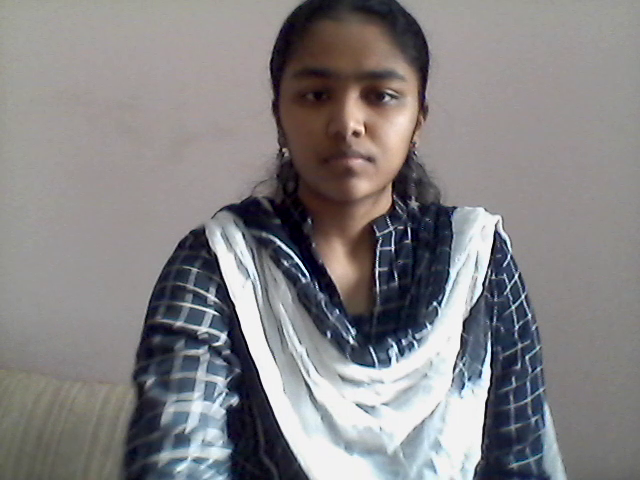

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Read/inf0004.png")
cv2_imshow(image)

In [ ]:
!rm -r "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/Read/inf0001.png"

In [ ]:
#ABSdiff conversion
cdir = "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/CroppedImages"
clist = os.listdir(cdir)
clist.sort()
output_abs = "/content/drive/MyDrive/Colab Notebooks/DeepLearning Project/ABSdiffImages"

#If the mentioned directory does not exist
if not os.path.exists(output_abs):
  os.mkdir(output_abs)

#ABSdiff
def ABSdiff(img1,img2):
  absdiff_images = cv2.absdiff(img1,img2)
  return absdiff_images

for i in range(0,len(clist)-1):
  print(i)
  print(i+1)
  current_image = clist[i]
  next_image = clist[i+1]
  img1 = cv2.imread(os.path.join(cdir,current_image))
  img2 = cv2.imread(os.path.join(cdir,next_image))
  absdiff = ABSdiff(img1, img2)
  cv2.imwrite(os.path.join(output_abs,current_image),absdiff)

0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99
100
100
101
101
102
102
103
103
104
104
105
105
106
106
107
107
108
108
109
109
110
110
111
111
112
112
113
113
114
114
115
115
116
116
117
117
118
118
119
119
120
120
121
121
122
122
123
123
124
124
125
125
126
126
127
127
128
128
129
129
130
130
131
131
132
132
133
133
134
134
135
135
136
136
137
137
138
138
139
139
140
140
141
141
142
142
143
143
144
144
145
145
146
146
147
147
148
148
149
149
150
150
151
151
152
15